# Project overview

The dataset is the Australian weather dataset obtained on Kaggle. The original data contains 150k rows, from which I randomly selected 5000 rows for analysis and prediction in Python. 

# Import libraries and data

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [9]:
weather = pd.read_csv('weatherAUS.csv')
weather = weather.sample(n=5000, axis=0)
weather.index = range(weather.shape[0])

## Data description

In [2]:
weather.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2009-02-10,Adelaide,13.7,21.1,0.0,9.4,6.4,SSE,43.0,S,...,54.0,33.0,1021.5,1020.3,NaN,NaN,16.0,19.2,No,No
1,2010-12-17,Albury,10.3,25.9,0.0,NaN,NaN,NW,46.0,NE,...,62.0,31.0,1005.3,1002.1,NaN,7.0,17.7,24.1,No,No
2,2015-07-10,Cobar,8.4,18.2,1.6,2.8,NaN,NNE,35.0,ENE,...,95.0,58.0,1020.8,1017.4,6.0,3.0,11.7,18.1,Yes,No
3,2010-08-03,Adelaide,7.1,12.4,0.0,1.8,0.0,WNW,24.0,ENE,...,65.0,65.0,1029.6,1026.1,NaN,NaN,10.8,11.7,No,Yes
4,2009-03-16,Richmond,12.2,27.2,0.2,8.7,NaN,WNW,30.0,SW,...,56.0,38.0,1012.1,1007.9,NaN,NaN,17.1,25.5,No,No


In [10]:
weather.shape

(5000, 23)

In [11]:
weather['RainTomorrow'].isnull().sum()

133

In [ ]:
weather = weather.loc[weather['RainTomorrow'].notnull(),:]

## Create X (features) and y(labels)

In [14]:
X = weather.iloc[:,:-1]
y = weather.iloc[:,-1]

In [15]:
X.shape

(4867, 22)

In [16]:
y.unique()

array(['Yes', 'No'], dtype=object)

In [17]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4867 entries, 0 to 4999
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           4867 non-null   object 
 1   Location       4867 non-null   object 
 2   MinTemp        4840 non-null   float64
 3   MaxTemp        4853 non-null   float64
 4   Rainfall       4829 non-null   float64
 5   Evaporation    2781 non-null   float64
 6   Sunshine       2493 non-null   float64
 7   WindGustDir    4541 non-null   object 
 8   WindGustSpeed  4543 non-null   float64
 9   WindDir9am     4531 non-null   object 
 10  WindDir3pm     4728 non-null   object 
 11  WindSpeed9am   4818 non-null   float64
 12  WindSpeed3pm   4773 non-null   float64
 13  Humidity9am    4796 non-null   float64
 14  Humidity3pm    4729 non-null   float64
 15  Pressure9am    4394 non-null   float64
 16  Pressure3pm    4399 non-null   float64
 17  Cloud9am       3047 non-null   float64
 18  Cloud3pm

In [18]:
X.isnull().mean()
# 缺失值侧率
# 缺的少：
# 缺的多：
# float缺失
# object缺失

Date             0.000000
Location         0.000000
MinTemp          0.005548
MaxTemp          0.002877
Rainfall         0.007808
Evaporation      0.428601
Sunshine         0.487775
WindGustDir      0.066982
WindGustSpeed    0.066571
WindDir9am       0.069036
WindDir3pm       0.028560
WindSpeed9am     0.010068
WindSpeed3pm     0.019314
Humidity9am      0.014588
Humidity3pm      0.028354
Pressure9am      0.097185
Pressure3pm      0.096158
Cloud9am         0.373947
Cloud3pm         0.401274
Temp9am          0.008013
Temp3pm          0.021574
RainToday        0.007808
dtype: float64

In [19]:
y.shape

(4867,)

In [20]:
y.isnull().sum()

0

## Split train and test data

In [ ]:
# 先分train和test，再进行特征工程
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

for i in [X_train, X_test, y_train, y_test]:
    i.index = range(i.shape[0])

# Data clean

In [23]:
X_train.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,2015-11-07,PearceRAAF,16.6,24.4,0.4,NaN,4.0,SW,39.0,SSW,...,24.0,65.0,54.0,1013.2,1012.6,8.0,NaN,19.1,24.2,No
1,2016-11-22,Albury,21.6,26.6,0.0,NaN,NaN,WSW,37.0,WSW,...,11.0,51.0,45.0,1013.5,1013.1,4.0,NaN,23.9,25.8,No
2,2016-10-08,Richmond,18.2,25.7,0.0,NaN,NaN,SE,43.0,NW,...,26.0,36.0,56.0,1015.0,1017.0,7.0,8.0,23.4,20.3,No
3,2010-06-14,Cobar,3.6,19.1,0.0,2.6,9.6,ENE,22.0,E,...,11.0,70.0,31.0,1031.9,1028.7,1.0,3.0,9.0,18.1,No
4,2010-01-09,Williamtown,17.1,35.4,0.0,5.4,12.1,WNW,31.0,NW,...,11.0,81.0,37.0,1018.5,1014.8,2.0,3.0,23.9,34.8,No


In [24]:
# Data banlanced?
y_train.value_counts()

No     2627
Yes     779
Name: RainTomorrow, dtype: int64

In [25]:
y_test.value_counts()

No     1144
Yes     317
Name: RainTomorrow, dtype: int64

In [ ]:
# Slight sample imbalance

In [26]:
# Label encoding - LabelEncoder
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder().fit(y_train)

y_train = pd.DataFrame(encoder.transform(y_train))
y_test = pd.DataFrame(encoder.transform(y_test))

In [27]:
# Save labels ready data
y_train.to_csv('train_data.csv')
y_test.to_csv('test_data.csv')

In [28]:
y_train

,0
0,0
1,1
2,0
3,0
4,0
...,...
3401,0
3402,0
3403,0
3404,0


In [29]:
X

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,2009-04-24,Launceston,10.7,17.3,0.0,0.8,NaN,N,44.0,NNW,...,19.0,81.0,89.0,1003.7,997.6,NaN,NaN,16.9,15.3,No
1,2015-10-16,SalmonGums,1.0,26.3,0.0,NaN,NaN,SE,31.0,NNE,...,9.0,44.0,23.0,NaN,NaN,NaN,NaN,18.2,25.8,No
2,2012-03-16,Sale,17.5,22.6,0.0,3.0,0.8,WSW,46.0,NNE,...,0.0,84.0,91.0,1006.9,1009.3,6.0,8.0,21.1,17.8,No
3,2013-04-28,Sale,15.0,21.4,0.0,8.2,8.1,NW,65.0,WSW,...,30.0,51.0,61.0,1012.5,1014.1,7.0,6.0,19.9,19.1,No
4,2017-02-27,Nhil,12.6,35.7,0.0,NaN,NaN,ENE,35.0,ENE,...,13.0,44.0,21.0,1020.0,1018.2,NaN,NaN,22.3,33.4,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,2014-01-29,Richmond,15.0,38.5,0.0,7.3,NaN,ESE,35.0,NaN,...,13.0,75.0,22.0,1016.9,1012.2,NaN,NaN,21.5,37.4,No
4996,2013-05-31,Hobart,10.3,18.4,0.0,2.8,4.1,NNW,41.0,NNW,...,13.0,75.0,53.0,1019.8,1015.0,NaN,NaN,10.5,17.4,No
4997,2016-02-01,Penrith,18.7,26.7,0.2,NaN,NaN,SSW,31.0,SSE,...,11.0,75.0,60.0,NaN,NaN,NaN,NaN,20.2,24.0,No
4998,2016-07-05,Bendigo,6.8,12.0,1.6,NaN,NaN,SSW,33.0,NaN,...,11.0,87.0,78.0,1012.5,1010.5,8.0,8.0,8.6,10.6,Yes


In [30]:
# Check X:
# Imbalance
# Data Distribution？
# Outliers?
X_train.describe([0.01,0.05,0.1,0.25,0.5,0.75,0.9,0.99]).T

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,99%,max
MinTemp,3386.0,12.182605,6.424837,-5.4,-2.000,1.600,3.80,7.600,12.0,16.975,20.7,25.800,29.0
MaxTemp,3396.0,23.227061,7.084472,-0.3,9.775,13.100,14.70,17.900,22.5,28.200,33.0,40.400,44.9
Rainfall,3384.0,2.453014,9.061530,0.0,0.000,0.000,0.00,0.000,0.0,0.800,6.0,38.136,216.3
Evaporation,1964.0,5.628513,4.986628,0.0,0.326,1.000,1.40,2.600,4.8,7.600,10.2,20.296,86.2
Sunshine,1750.0,7.601086,3.841732,0.0,0.000,0.400,1.40,4.625,8.4,10.700,12.1,13.400,13.8
WindGustSpeed,3171.0,40.078524,14.172812,9.0,15.000,20.000,24.00,31.000,39.0,48.000,57.0,83.000,126.0
WindSpeed9am,3367.0,14.015444,9.035041,0.0,0.000,0.000,2.00,7.000,13.0,20.000,26.0,41.000,87.0
WindSpeed3pm,3337.0,18.624213,9.007836,0.0,2.000,6.000,9.00,13.000,17.0,24.000,30.0,44.000,78.0
Humidity9am,3359.0,69.358738,19.043481,2.0,18.000,34.000,45.00,58.000,70.0,84.000,94.0,100.000,100.0
Humidity3pm,3316.0,51.590772,20.586379,1.0,9.000,17.000,23.00,37.000,52.0,65.000,79.0,97.000,100.0


In [31]:
X_test.describe([0.01,0.05,0.1,0.25,0.5,0.75,0.9,0.99]).T

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,99%,max
MinTemp,1454.0,12.123796,6.129042,-6.8,-1.547,2.20,4.23,7.80,12.0,16.6,20.2,25.800,28.8
MaxTemp,1457.0,23.345024,7.032912,-2.2,8.812,13.10,14.70,18.10,22.9,28.0,32.8,40.100,43.8
Rainfall,1445.0,2.299100,7.089085,0.0,0.000,0.00,0.00,0.00,0.0,0.6,6.2,37.320,97.2
Evaporation,817.0,5.664627,4.627326,0.0,0.400,1.00,1.60,2.80,4.8,7.2,10.2,18.800,48.4
Sunshine,743.0,7.767699,3.641581,0.0,0.000,0.61,1.72,5.35,8.7,10.7,11.9,13.300,14.0
WindGustSpeed,1372.0,40.348397,13.685204,11.0,15.000,20.00,24.00,31.00,39.0,48.0,59.0,78.000,107.0
WindSpeed9am,1451.0,14.457615,9.271616,0.0,0.000,0.00,4.00,7.00,13.0,20.0,28.0,39.000,61.0
WindSpeed3pm,1436.0,18.527855,8.898572,0.0,2.000,6.00,7.00,11.00,17.0,24.0,30.0,43.000,83.0
Humidity9am,1437.0,68.305498,18.876429,6.0,17.360,34.00,44.00,57.00,69.0,82.0,94.0,100.000,100.0
Humidity3pm,1413.0,50.359519,20.233470,2.0,9.000,17.00,23.00,36.00,51.0,64.0,77.0,97.000,100.0


## Process date

In [32]:
# Missing values
X_trainc = X_train.copy()
X_trainc.sort_values(by='Location')

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
3325,2009-04-07,Adelaide,12.5,21.2,0.0,3.0,9.4,SE,35.0,SE,...,15.0,57.0,40.0,1031.9,1028.3,NaN,NaN,15.4,20.6,No
684,2014-06-02,Adelaide,11.1,18.2,1.0,4.0,NaN,S,24.0,NaN,...,15.0,88.0,77.0,1020.3,1019.1,NaN,NaN,14.5,17.1,No
1269,2016-04-10,Adelaide,13.0,22.6,0.0,NaN,NaN,SW,28.0,ENE,...,17.0,84.0,58.0,1024.7,1023.2,NaN,NaN,16.6,21.2,No
491,2014-10-16,Adelaide,7.6,19.1,0.0,3.4,NaN,WSW,30.0,N,...,15.0,61.0,44.0,1025.0,1023.5,NaN,NaN,12.0,18.6,No
1267,2014-02-19,Adelaide,14.7,21.2,3.4,5.0,10.3,SSW,57.0,S,...,31.0,70.0,48.0,1007.7,1008.3,NaN,NaN,17.0,20.2,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2280,2009-11-11,Woomera,23.4,39.6,0.0,16.0,12.8,ENE,43.0,NNW,...,13.0,11.0,9.0,1019.9,1017.5,1.0,1.0,32.2,37.6,No
2335,2016-05-21,Woomera,12.0,24.6,0.0,4.2,6.6,NNW,44.0,NNE,...,26.0,52.0,26.0,1020.4,1014.3,6.0,4.0,15.6,23.9,No
2344,2009-02-10,Woomera,14.3,25.6,0.0,18.8,12.7,S,63.0,SSE,...,30.0,46.0,24.0,1017.9,1016.9,1.0,1.0,16.8,23.8,No
1893,2017-05-19,Woomera,7.7,21.1,0.0,1.0,NaN,NW,22.0,WSW,...,13.0,92.0,55.0,1017.8,1014.5,0.0,NaN,12.2,19.2,No


In [33]:
X_trainc.iloc[:,0].value_counts()
# Duplicate dates: The reason is that infomation was collected at different locations at the same date

2017-05-21    7
2014-12-01    6
2012-11-23    6
2016-10-25    5
2014-01-02    5
             ..
2012-01-17    1
2017-03-09    1
2011-05-01    1
2014-07-15    1
2010-12-15    1
Name: Date, Length: 2061, dtype: int64

In [34]:
type(X_trainc.iloc[0,0])  # process string features

str

In [35]:
# Processing consider
# Method 1: delete datetime as datetime is not related to "rain tomorrow"
X_train.drop('Date',axis=1)
X_test.drop('Date',axis=1)
X_train.index = range(weather.shape[0])
X_test.index = range(weather.shape[0])

# Method 2：Transform features to label associated - Is it raining today?
X_train.loc[X_train['Rainfall']>=0.1,"RainToday"] = 'Yes'
X_train.loc[X_train['Rainfall']<0.1,"RainToday"] = 'No'
X_train.loc[X_train['Rainfall']>=np.nan,"RainToday"] = np.nan

X_test.loc[X_test['Rainfall']>=0.1,"RainToday"] = 'Yes'
X_test.loc[X_test['Rainfall']<0.1,"RainToday"] = 'No'
X_test.loc[X_test['Rainfall']>=np.nan,"RainToday"] = np.nan

ValueError: Length mismatch: Expected axis has 3406 elements, new values have 4867 elements

In [36]:
X_train.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,2015-11-07,PearceRAAF,16.6,24.4,0.4,NaN,4.0,SW,39.0,SSW,...,24.0,65.0,54.0,1013.2,1012.6,8.0,NaN,19.1,24.2,No
1,2016-11-22,Albury,21.6,26.6,0.0,NaN,NaN,WSW,37.0,WSW,...,11.0,51.0,45.0,1013.5,1013.1,4.0,NaN,23.9,25.8,No
2,2016-10-08,Richmond,18.2,25.7,0.0,NaN,NaN,SE,43.0,NW,...,26.0,36.0,56.0,1015.0,1017.0,7.0,8.0,23.4,20.3,No
3,2010-06-14,Cobar,3.6,19.1,0.0,2.6,9.6,ENE,22.0,E,...,11.0,70.0,31.0,1031.9,1028.7,1.0,3.0,9.0,18.1,No
4,2010-01-09,Williamtown,17.1,35.4,0.0,5.4,12.1,WNW,31.0,NW,...,11.0,81.0,37.0,1018.5,1014.8,2.0,3.0,23.9,34.8,No


In [ ]:
# Processing idea: according to the season (Month) transformation into relevant characteristics

11

In [38]:
# extract month
X_train.loc[:,'Date'] = X_train.loc[:,'Date'].apply(lambda x:int(x.split('-')[1]))

D:\Anaconda\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [39]:
X_train = X_train.rename(columns={"Date":"Month"})

In [40]:
X_test.loc[:,'Date'] = X_test.loc[:,'Date'].apply(lambda x:int(x.split('-')[1]))
X_test = X_test.rename(columns={"Date":"Month"})

In [41]:
X_test.head()

,Month,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,6,MelbourneAirport,2.0,17.3,0.0,1.4,8.5,N,30.0,N,...,13.0,79.0,44.0,1024.1,1021.2,1.0,0.0,6.4,16.9,No
1,6,SalmonGums,8.3,14.9,7.0,NaN,NaN,NW,20.0,NW,...,7.0,93.0,79.0,NaN,NaN,NaN,NaN,12.2,14.3,Yes
2,4,Launceston,7.1,22.3,0.2,NaN,NaN,ESE,20.0,NaN,...,9.0,95.0,55.0,1020.1,1019.6,NaN,NaN,11.7,22.1,No
3,1,Nuriootpa,17.4,23.0,0.0,4.0,0.0,SW,33.0,S,...,19.0,79.0,94.0,1002.8,999.2,8.0,8.0,21.1,19.1,No
4,2,Perth,18.2,34.9,0.0,5.0,9.1,SSW,28.0,NNE,...,13.0,65.0,44.0,1013.2,1012.7,3.0,7.0,24.9,31.7,No


## process location

In [42]:
X.loc[:,'Location'].unique()

array(['Launceston', 'SalmonGums', 'Sale', 'Nhil', 'NorahHead',
       'Adelaide', 'Albany', 'Perth', 'Hobart', 'Williamtown', 'Watsonia',
       'Richmond', 'Ballarat', 'Dartmoor', 'Sydney', 'Mildura', 'Cobar',
       'PerthAirport', 'MountGambier', 'AliceSprings', 'MelbourneAirport',
       'Woomera', 'Penrith', 'Katherine', 'Canberra', 'GoldCoast',
       'MountGinini', 'PearceRAAF', 'BadgerysCreek', 'Brisbane', 'Darwin',
       'Portland', 'Bendigo', 'Nuriootpa', 'Witchcliffe', 'Townsville',
       'Melbourne', 'Albury', 'WaggaWagga', 'Walpole', 'Uluru',
       'NorfolkIsland', 'CoffsHarbour', 'Cairns', 'Newcastle',
       'SydneyAirport', 'Moree', 'Wollongong', 'Tuggeranong'],
      dtype=object)

In [44]:
# Prepare data: city,Latitude,Longitude in file city_ll.csv
cityll = pd.read_csv('City_ll.csv',index_col=0)
city_climate = pd.read_csv('Climate-zone-map-aust.csv',encoding='cp1252')

In [45]:
cityll.head()

,city,Latitude,Longitude,Latitudedir,Longitudedir
0,Exmouth,21.9323°,114.1279°,"S,",E
1,Dampier,20.6624°,116.7105°,"S,",E
2,Port Hedland,20.3124°,118.6094°,"S,",E
3,Broome,17.9618°,122.2370°,"S,",E
4,Derby,17.3093°,123.6402°,"S,",E


In [46]:
city_climate.head()

,City,Climate
0,Exmouth,"high humidity summer, warm winter"
1,Dampier,"high humidity summer, warm winter"
2,Port Hedland,"high humidity summer, warm winter"
3,Broome,"high humidity summer, warm winter"
4,Derby,"high humidity summer, warm winter"


In [47]:
# Remove the latitude and longitude symbols
cityll['Latitudenum'] = cityll['Latitude'].apply(lambda x:float(x[:-1]))
cityll['Longitudenum'] = cityll['Longitude'].apply(lambda x:float(x[:-1]))

In [48]:
cityll.iloc[:,3].value_counts()

S,    113
Name: Latitudedir, dtype: int64

In [49]:
# remove two columns
citylld = cityll.iloc[:,[0,5,6]]
citylld['climate'] = city_climate.iloc[:,-1]

C:\Users\le\AppData\Local\Temp/ipykernel_16976/1625561169.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  citylld['climate'] = city_climate.iloc[:,-1]


In [50]:
citylld.head()

,city,Latitudenum,Longitudenum,climate
0,Exmouth,21.9323,114.1279,"high humidity summer, warm winter"
1,Dampier,20.6624,116.7105,"high humidity summer, warm winter"
2,Port Hedland,20.3124,118.6094,"high humidity summer, warm winter"
3,Broome,17.9618,122.2370,"high humidity summer, warm winter"
4,Derby,17.3093,123.6402,"high humidity summer, warm winter"


In [51]:
city_climate.iloc[:,-1].value_counts()

cool temperate                       27
high humidity summer, warm winter    20
hot dry summer, cool winter          20
warm temperate                       17
hot dry summer, warm winter          16
mild temperate                        8
warm humid summer, mild winter        5
Name: Climate, dtype: int64

In [52]:
# Prepare data: create a list contains all city names in X_train (& X_test)
cityname = X.iloc[:,1].value_counts().index.tolist()
cityname

['Tuggeranong',
 'Woomera',
 'WaggaWagga',
 'Sydney',
 'Richmond',
 'Sale',
 'Hobart',
 'Witchcliffe',
 'Launceston',
 'Perth',
 'Penrith',
 'Watsonia',
 'NorfolkIsland',
 'Albany',
 'Canberra',
 'Moree',
 'BadgerysCreek',
 'Nuriootpa',
 'Brisbane',
 'MountGambier',
 'Walpole',
 'Bendigo',
 'SydneyAirport',
 'PerthAirport',
 'Newcastle',
 'GoldCoast',
 'Mildura',
 'Ballarat',
 'Adelaide',
 'MelbourneAirport',
 'CoffsHarbour',
 'Williamtown',
 'Portland',
 'Melbourne',
 'MountGinini',
 'Wollongong',
 'Darwin',
 'AliceSprings',
 'SalmonGums',
 'Albury',
 'Townsville',
 'Cobar',
 'PearceRAAF',
 'Dartmoor',
 'NorahHead',
 'Cairns',
 'Katherine',
 'Uluru',
 'Nhil']

In [65]:
# Crawl city ll information
from selenium import webdriver


df = pd.DataFrame(index=range(len(cityname)))

driver = webdriver.Chrome(executable_path='C:\Program Files (x86)\Google\Chrome\Application\chromedriver.exe')
time0 = time.time()
for num, city in enumerate(cityname):
    try:
        driver.get('https://www.google.co.uk/webhp?h1=en&sa=x&ved=0ahUKEwimtcx24cTfAhUJE7wKHVkwB5AQPAgH')

        time.sleep(0.3)
        search_box = driver.find_element_by_name('q')
        search_box.send_keys('{} Australia Latitude and longitude'.format(city))
        search_box.submit()

        result = driver.find_element_by_xpath('/html/body/div[7]/div/div[10]/div[1]/div[2]/div[2]/div/div/div[1]/block-component/div/div[1]/div[1]/div/div/div[1]/div/div/div[2]/div/div/div/div[1]').text


        resultsplit = result.split(" ")
        df.loc[num,'city'] = city
        df.loc[num,'Latitude'] = resultsplit[0]
        df.loc[num,'Longitude'] = resultsplit[2]
        df.loc[num,'Latitudedir'] = resultsplit[1]
        df.loc[num,'Longitudedir'] = resultsplit[3]
        print('{} webcrawler successfuld for city {}'.format(num,city))
    except:
        print('The xpath for the {} has issues'.format(city))
    
time.sleep(1)
driver.quit()
print(time.time()-time0)

C:\Users\OEM\AppData\Local\Temp/ipykernel_7860/3887714253.py:6: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(executable_path='C:\Program Files (x86)\Google\Chrome\Application\chromedriver.exe')
C:\Users\OEM\AppData\Local\Temp/ipykernel_7860/3887714253.py:13: DeprecationWarning: find_element_by_name is deprecated. Please use find_element(by=By.NAME, value=name) instead
  search_box = driver.find_element_by_name('q')
C:\Users\OEM\AppData\Local\Temp/ipykernel_7860/3887714253.py:17: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  result = driver.find_element_by_xpath('/html/body/div[7]/div/div[10]/div[1]/div[2]/div[2]/div/div/div[1]/block-component/div/div[1]/div[1]/div/div/div[1]/div/div/div[2]/div/div/div/div[1]').text


0 webcrawler successfuld for city Launceston
1 webcrawler successfuld for city Sydney
2 webcrawler successfuld for city Portland
3 webcrawler successfuld for city Adelaide
4 webcrawler successfuld for city Walpole
The xpath for the Woomera has issues
6 webcrawler successfuld for city AliceSprings
The xpath for the Canberra has issues
8 webcrawler successfuld for city NorfolkIsland
The xpath for the SydneyAirport has issues
10 webcrawler successfuld for city Hobart
11 webcrawler successfuld for city Darwin
12 webcrawler successfuld for city Perth
13 webcrawler successfuld for city Dartmoor
14 webcrawler successfuld for city MountGambier
15 webcrawler successfuld for city MelbourneAirport
16 webcrawler successfuld for city WaggaWagga
17 webcrawler successfuld for city Cairns
18 webcrawler successfuld for city CoffsHarbour
The xpath for the Brisbane has issues
20 webcrawler successfuld for city Albury
The xpath for the SalmonGums has issues
22 webcrawler successfuld for city Wollongong
23

In [66]:
samplecity = df.to_csv('samplecity.csv')

In [54]:
samplecity = pd.read_csv('samplecity.csv',index_col=0)

# remove ll symbols
samplecity['Latitudenum'] = samplecity['Latitude'].apply(lambda x:float(x[:-1]))
samplecity['Longitudenum'] = samplecity['Longitude'].apply(lambda x:float(x[:-1]))

samplecityd = samplecity.iloc[:,[0,5,6]]

In [55]:
samplecityd.head()

,city,Latitudenum,Longitudenum
0,Launceston,41.4391,147.1358
1,Sydney,33.8688,151.2093
2,Portland,38.3380,141.6041
3,Adelaide,34.9285,138.6007
4,Walpole,34.9762,116.7313


In [56]:
samplecityd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49 entries, 0 to 48
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   city          49 non-null     object 
 1   Latitudenum   49 non-null     float64
 2   Longitudenum  49 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.5+ KB


In [57]:
# Calculate the distance between the location (weather station) and the city in the original data, and get the nearest city 
# name as the new location

# convert ll to radians 
from math import radians, sin, cos, acos
samplecityd.loc[:,'elat'] = samplecityd.loc[:,'Latitudenum'].apply(lambda x: radians(x))
samplecityd.loc[:,'elon'] = samplecityd.loc[:,'Longitudenum'].apply(lambda x: radians(x))

D:\Anaconda\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


In [58]:
citylld.loc[:,'slat'] = citylld.loc[:,'Latitudenum'].apply(lambda x: radians(x))
citylld.loc[:,'slon'] = citylld.loc[:,'Longitudenum'].apply(lambda x: radians(x))

In [59]:
samplecityd.head()

,city,Latitudenum,Longitudenum,elat,elon
0,Launceston,41.4391,147.1358,0.723249,2.568004
1,Sydney,33.8688,151.2093,0.591122,2.639100
2,Portland,38.3380,141.6041,0.669124,2.471458
3,Adelaide,34.9285,138.6007,0.609617,2.419039
4,Walpole,34.9762,116.7313,0.610450,2.037346


In [60]:
citylld.head()

,city,Latitudenum,Longitudenum,climate,slat,slon
0,Exmouth,21.9323,114.1279,"high humidity summer, warm winter",0.382791,1.991908
1,Dampier,20.6624,116.7105,"high humidity summer, warm winter",0.360627,2.036982
2,Port Hedland,20.3124,118.6094,"high humidity summer, warm winter",0.354518,2.070125
3,Broome,17.9618,122.2370,"high humidity summer, warm winter",0.313493,2.133438
4,Derby,17.3093,123.6402,"high humidity summer, warm winter",0.302104,2.157929


In [61]:
import sys
for i in range(samplecityd.shape[0]):
    slat = citylld.loc[:,'slat']
    slon = citylld.loc[:,'slon']
    elat = samplecityd.loc[i,'elat']
    elon = samplecityd.loc[i,'elon']
    
    dist = 6371.01 * np.arccos(np.sin(slat)*np.sin(elat) + np.cos(slat)*np.cos(elat)*np.cos(slon.values - elon))
    
    city_index = np.argsort(dist)[0]  #sort - get first - the cloest city name
    samplecityd.loc[i,"cloest_city"] = citylld.loc[city_index,'city']
    samplecityd.loc[i,'climate'] = citylld.loc[city_index,'climate']

D:\Anaconda\lib\site-packages\pandas\core\indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
D:\Anaconda\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [62]:
samplecityd.head()

,city,Latitudenum,Longitudenum,elat,elon,cloest_city,climate
0,Launceston,41.4391,147.1358,0.723249,2.568004,Launceston,cool temperate
1,Sydney,33.8688,151.2093,0.591122,2.639100,Sydney,warm temperate
2,Portland,38.3380,141.6041,0.669124,2.471458,Hamilton,cool temperate
3,Adelaide,34.9285,138.6007,0.609617,2.419039,Adelalde,warm temperate
4,Walpole,34.9762,116.7313,0.610450,2.037346,Albany,mild temperate


In [63]:
samplecityd.climate.value_counts()

warm temperate                       13
cool temperate                       11
mild temperate                        8
high humidity summer, warm winter     5
hot dry summer, cool winter           5
warm humid summer, mild winter        4
hot dry summer, warm winter           3
Name: climate, dtype: int64

In [64]:
# combine location and climate into new dataframe
localfinal = samplecityd.iloc[:,[0,-1]]

In [65]:
localfinal.columns = ['Location','Climate']

In [66]:
localfinal.head()

,Location,Climate
0,Launceston,cool temperate
1,Sydney,warm temperate
2,Portland,cool temperate
3,Adelaide,warm temperate
4,Walpole,mild temperate


In [67]:
# set Location as index
localfinal = localfinal.set_index(keys='Location')

In [68]:
localfinal.to_csv('localfinal.csv')

In [69]:
X_train

,Month,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,11,PearceRAAF,16.6,24.4,0.4,NaN,4.0,SW,39.0,SSW,...,24.0,65.0,54.0,1013.2,1012.6,8.0,NaN,19.1,24.2,No
1,11,Albury,21.6,26.6,0.0,NaN,NaN,WSW,37.0,WSW,...,11.0,51.0,45.0,1013.5,1013.1,4.0,NaN,23.9,25.8,No
2,10,Richmond,18.2,25.7,0.0,NaN,NaN,SE,43.0,NW,...,26.0,36.0,56.0,1015.0,1017.0,7.0,8.0,23.4,20.3,No
3,6,Cobar,3.6,19.1,0.0,2.6,9.6,ENE,22.0,E,...,11.0,70.0,31.0,1031.9,1028.7,1.0,3.0,9.0,18.1,No
4,1,Williamtown,17.1,35.4,0.0,5.4,12.1,WNW,31.0,NW,...,11.0,81.0,37.0,1018.5,1014.8,2.0,3.0,23.9,34.8,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3401,7,Tuggeranong,-1.3,12.5,0.0,NaN,NaN,WSW,48.0,NaN,...,22.0,78.0,56.0,1014.0,1012.5,NaN,NaN,3.1,10.2,No
3402,4,Moree,4.2,22.0,0.0,NaN,NaN,SSW,26.0,SSW,...,15.0,71.0,42.0,1020.5,1017.7,NaN,NaN,11.3,21.9,No
3403,2,SydneyAirport,20.5,25.4,0.0,12.0,1.2,SSE,67.0,ESE,...,43.0,70.0,89.0,1017.2,1019.6,7.0,8.0,24.2,19.1,No
3404,12,CoffsHarbour,17.8,31.2,2.6,NaN,NaN,NE,52.0,NE,...,37.0,69.0,63.0,1009.5,1008.2,NaN,NaN,25.7,26.8,Yes


In [70]:
# replace location by Climate
# X_train['Location'] = X_train['Location'].map(localfinal.iloc[:,0])

import re
X_train['Location'] = X_train['Location'].map(localfinal.iloc[:,0].apply(lambda x:re.sub(",","",x.strip()))) #re.sub 替用“”换“，”
X_test['Location'] = X_test['Location'].map(localfinal.iloc[:,0].apply(lambda x:re.sub(",","",x.strip())))

In [71]:
X_train = X_train.rename(columns={'Location':'Climate'})
X_test = X_test.rename(columns={'Location':'Climate'})

In [72]:
X_train.head()

,Month,Climate,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,11,warm temperate,16.6,24.4,0.4,NaN,4.0,SW,39.0,SSW,...,24.0,65.0,54.0,1013.2,1012.6,8.0,NaN,19.1,24.2,No
1,11,hot dry summer cool winter,21.6,26.6,0.0,NaN,NaN,WSW,37.0,WSW,...,11.0,51.0,45.0,1013.5,1013.1,4.0,NaN,23.9,25.8,No
2,10,mild temperate,18.2,25.7,0.0,NaN,NaN,SE,43.0,NW,...,26.0,36.0,56.0,1015.0,1017.0,7.0,8.0,23.4,20.3,No
3,6,warm temperate,3.6,19.1,0.0,2.6,9.6,ENE,22.0,E,...,11.0,70.0,31.0,1031.9,1028.7,1.0,3.0,9.0,18.1,No
4,1,warm temperate,17.1,35.4,0.0,5.4,12.1,WNW,31.0,NW,...,11.0,81.0,37.0,1018.5,1014.8,2.0,3.0,23.9,34.8,No


In [73]:
X_test.head()

,Month,Climate,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,6,mild temperate,2.0,17.3,0.0,1.4,8.5,N,30.0,N,...,13.0,79.0,44.0,1024.1,1021.2,1.0,0.0,6.4,16.9,No
1,6,hot dry summer cool winter,8.3,14.9,7.0,NaN,NaN,NW,20.0,NW,...,7.0,93.0,79.0,NaN,NaN,NaN,NaN,12.2,14.3,Yes
2,4,cool temperate,7.1,22.3,0.2,NaN,NaN,ESE,20.0,NaN,...,9.0,95.0,55.0,1020.1,1019.6,NaN,NaN,11.7,22.1,No
3,1,warm temperate,17.4,23.0,0.0,4.0,0.0,SW,33.0,S,...,19.0,79.0,94.0,1002.8,999.2,8.0,8.0,21.1,19.1,No
4,2,warm temperate,18.2,34.9,0.0,5.0,9.1,SSW,28.0,NNE,...,13.0,65.0,44.0,1013.2,1012.7,3.0,7.0,24.9,31.7,No


## Fill missing values

In [74]:
X_train.isnull().mean()

Month            0.000000
Climate          0.000000
MinTemp          0.005872
MaxTemp          0.002936
Rainfall         0.006459
Evaporation      0.423371
Sunshine         0.486201
WindGustDir      0.068996
WindGustSpeed    0.068996
WindDir9am       0.071932
WindDir3pm       0.030241
WindSpeed9am     0.011450
WindSpeed3pm     0.020258
Humidity9am      0.013799
Humidity3pm      0.026424
Pressure9am      0.096301
Pressure3pm      0.095420
Cloud9am         0.366412
Cloud3pm         0.392543
Temp9am          0.007046
Temp3pm          0.020258
RainToday        0.006459
dtype: float64

In [ ]:
# Subtype features
cate = X_train.columns[X_train.dtypes == 'object'].tolist()

In [76]:
cate

['Climate', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

In [77]:
cloud = ['Cloud9am','Cloud3pm']
cate = cate + cloud
cate

['Climate',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'Cloud9am',
 'Cloud3pm']

In [78]:
from sklearn.impute import SimpleImputer

si = SimpleImputer(missing_values=np.nan,strategy='most_frequent')
si.fit(X_train.loc[:,cate])

X_train.loc[:,cate] = si.transform(X_train.loc[:,cate])
X_test.loc[:,cate] = si.transform(X_test.loc[:,cate])

In [79]:
X_train.head()

,Month,Climate,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,11,warm temperate,16.6,24.4,0.4,NaN,4.0,SW,39.0,SSW,...,24.0,65.0,54.0,1013.2,1012.6,8.0,7.0,19.1,24.2,No
1,11,hot dry summer cool winter,21.6,26.6,0.0,NaN,NaN,WSW,37.0,WSW,...,11.0,51.0,45.0,1013.5,1013.1,4.0,7.0,23.9,25.8,No
2,10,mild temperate,18.2,25.7,0.0,NaN,NaN,SE,43.0,NW,...,26.0,36.0,56.0,1015.0,1017.0,7.0,8.0,23.4,20.3,No
3,6,warm temperate,3.6,19.1,0.0,2.6,9.6,ENE,22.0,E,...,11.0,70.0,31.0,1031.9,1028.7,1.0,3.0,9.0,18.1,No
4,1,warm temperate,17.1,35.4,0.0,5.4,12.1,WNW,31.0,NW,...,11.0,81.0,37.0,1018.5,1014.8,2.0,3.0,23.9,34.8,No


In [80]:
X_test.loc[:,cate].isnull().sum()

Climate        0
WindGustDir    0
WindDir9am     0
WindDir3pm     0
RainToday      0
Cloud9am       0
Cloud3pm       0
dtype: int64

In [81]:
# Continuous features
col = X_train.columns.tolist()
for i in cate:
    col.remove(i)
col

['Month',
 'MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Temp9am',
 'Temp3pm']

In [82]:
impmean = SimpleImputer(missing_values=np.nan,strategy='mean')
impmean.fit(X_train.loc[:,col])

X_train.loc[:,col] = impmean.transform(X_train.loc[:,col])
X_test.loc[:,col] = impmean.transform(X_test.loc[:,col])

## Encoding

In [83]:
# Subtype features - Ordinal encoder
from sklearn.preprocessing import OrdinalEncoder  
oe = OrdinalEncoder()

oe.fit(X_train.loc[:,cate])

X_train.loc[:,cate]  = oe.transform(X_train.loc[:,cate])
X_test.loc[:,cate]  = oe.transform(X_test.loc[:,cate])

In [84]:
X_train.loc[:,cate].head()

,Climate,WindGustDir,WindDir9am,WindDir3pm,RainToday,Cloud9am,Cloud3pm
0,6.0,12.0,11.0,11.0,0.0,8.0,7.0
1,2.0,15.0,15.0,15.0,0.0,4.0,7.0
2,4.0,9.0,7.0,9.0,0.0,7.0,8.0
3,6.0,1.0,0.0,1.0,0.0,1.0,3.0
4,6.0,14.0,7.0,13.0,0.0,2.0,3.0


In [85]:
X_train.head()

,Month,Climate,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,11.0,6.0,16.6,24.4,0.4,5.628513,4.000000,12.0,39.0,11.0,...,24.0,65.0,54.0,1013.2,1012.6,8.0,7.0,19.1,24.2,0.0
1,11.0,2.0,21.6,26.6,0.0,5.628513,7.601086,15.0,37.0,15.0,...,11.0,51.0,45.0,1013.5,1013.1,4.0,7.0,23.9,25.8,0.0
2,10.0,4.0,18.2,25.7,0.0,5.628513,7.601086,9.0,43.0,7.0,...,26.0,36.0,56.0,1015.0,1017.0,7.0,8.0,23.4,20.3,0.0
3,6.0,6.0,3.6,19.1,0.0,2.600000,9.600000,1.0,22.0,0.0,...,11.0,70.0,31.0,1031.9,1028.7,1.0,3.0,9.0,18.1,0.0
4,1.0,6.0,17.1,35.4,0.0,5.400000,12.100000,14.0,31.0,7.0,...,11.0,81.0,37.0,1018.5,1014.8,2.0,3.0,23.9,34.8,0.0


In [86]:
# cehck data
X_train.isnull().mean()

Month            0.0
Climate          0.0
MinTemp          0.0
MaxTemp          0.0
Rainfall         0.0
Evaporation      0.0
Sunshine         0.0
WindGustDir      0.0
WindGustSpeed    0.0
WindDir9am       0.0
WindDir3pm       0.0
WindSpeed9am     0.0
WindSpeed3pm     0.0
Humidity9am      0.0
Humidity3pm      0.0
Pressure9am      0.0
Pressure3pm      0.0
Cloud9am         0.0
Cloud3pm         0.0
Temp9am          0.0
Temp3pm          0.0
RainToday        0.0
dtype: float64

In [87]:
X_test.isnull().mean()

Month            0.0
Climate          0.0
MinTemp          0.0
MaxTemp          0.0
Rainfall         0.0
Evaporation      0.0
Sunshine         0.0
WindGustDir      0.0
WindGustSpeed    0.0
WindDir9am       0.0
WindDir3pm       0.0
WindSpeed9am     0.0
WindSpeed3pm     0.0
Humidity9am      0.0
Humidity3pm      0.0
Pressure9am      0.0
Pressure3pm      0.0
Cloud9am         0.0
Cloud3pm         0.0
Temp9am          0.0
Temp3pm          0.0
RainToday        0.0
dtype: float64

In [88]:
# remove Month column
col.remove('Month')

In [89]:
col

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Temp9am',
 'Temp3pm']

## Standardization

In [90]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss = ss.fit(X_train.loc[:,col])
X_train.loc[:,col] = ss.transform(X_train.loc[:,col])
X_test.loc[:,col] = ss.transform(X_test.loc[:,col])

In [91]:
X_train.head()

,Month,Climate,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,11.0,6.0,0.689679,0.165833,-0.227333,0.000000,-1.308078e+00,12.0,-0.078880,11.0,...,0.603019,-0.230514,0.118626,-0.622023,-0.369298,8.0,7.0,0.333852,0.371783,0.0
1,11.0,2.0,1.470319,0.476874,-0.271625,0.000000,-3.226269e-16,15.0,-0.225154,15.0,...,-0.855232,-0.970909,-0.324517,-0.578472,-0.295725,4.0,7.0,1.074135,0.606905,0.0
2,10.0,4.0,0.939484,0.349630,-0.271625,0.000000,-3.226269e-16,9.0,0.213668,7.0,...,0.827365,-1.764190,0.217102,-0.360714,0.278145,7.0,8.0,0.997022,-0.201329,0.0
3,6.0,6.0,-1.339985,-0.583493,-0.271625,-0.799990,7.260968e-01,1.0,-1.322208,0.0,...,-0.855232,0.033913,-1.013849,2.092695,1.999754,1.0,3.0,-1.223827,-0.524622,0.0
4,1.0,6.0,0.767743,1.721038,-0.271625,-0.060362,1.634211e+00,14.0,-0.663975,7.0,...,-0.855232,0.615653,-0.718421,0.147389,-0.045577,2.0,3.0,1.074135,1.929470,0.0


In [92]:
X_test.head()

,Month,Climate,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,6.0,4.0,-1.589790,-0.837981,-0.271625,-1.116974,3.265266e-01,3.0,-0.737112,3.0,...,-0.630886,0.509882,-0.373755,0.960353,8.961583e-01,1.0,0.0,-1.624814,-0.700964,0.0
1,6.0,2.0,-0.606183,-1.177299,0.503493,0.000000,-3.226269e-16,7.0,-1.468481,7.0,...,-1.303924,1.250277,1.349576,0.000000,-1.672857e-14,7.0,7.0,-0.730305,-1.083039,1.0
2,4.0,0.0,-0.793537,-0.131070,-0.249479,0.000000,-3.226269e-16,2.0,-1.468481,3.0,...,-1.079578,1.356048,0.167864,0.379664,6.607246e-01,7.0,7.0,-0.807418,0.063184,0.0
3,1.0,6.0,0.814582,-0.032102,-0.271625,-0.430176,-2.761061e+00,12.0,-0.517701,8.0,...,0.042153,0.509882,2.088146,-2.131813,-2.341055e+00,8.0,8.0,0.642303,-0.377671,0.0
4,2.0,6.0,0.939484,1.650347,-0.271625,-0.166024,5.444740e-01,11.0,-0.883386,5.0,...,-0.630886,-0.230514,-0.373755,-0.622023,-3.545834e-01,3.0,7.0,1.228360,1.473920,0.0


In [93]:
X_train.to_csv('X_train.csv')
X_test.to_csv('X_test.csv')

# build model - SVC

In [94]:
from time import time
import datetime
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score, recall_score

In [95]:
# unstack y
y_train = y_train.iloc[:,0].ravel()
y_test = y_test.iloc[:,0].ravel()

In [96]:
times = time()

for k in ['linear','poly','rbf','sigmoid']:
    clf = SVC(kernel = k
             ,gamma = 'auto'
             ,degree = 1
             ,cache_size = 5000
             ).fit(X_train, y_train)
    result = clf.predict(X_test)
    score = clf.score(X_test, y_test)  # Accuracy
    recall = recall_score(y_test, result)
    auc = roc_auc_score(y_test, clf.decision_function(X_test))
    print('{} tesing accuracy is {}, recall is {}, auc is {}'.format(k, score, recall, auc))
    print(datetime.datetime.fromtimestamp(time()-times).strftime('%M:%S:%f'))

linear tesing accuracy is 0.8254620123203286, recall is 0.41324921135646686, auc is 0.8328847808343077
00:03:692260
poly tesing accuracy is 0.8275154004106776, recall is 0.416403785488959, auc is 0.8332487701572875
00:04:238042
rbf tesing accuracy is 0.8158795345653662, recall is 0.305993690851735, auc is 0.7679512916105976
00:06:256168
sigmoid tesing accuracy is 0.6543463381245722, recall is 0.13564668769716087, auc is 0.45137985043347817
00:06:799292


Judgment model is linear
Recall was not good，accuracy & auc normal

# Model Tuning

## 1. Highight recall - Capturing minority classes

In [65]:
# change class_weight='balanced'
times = time()

for k in ['linear','poly','rbf','sigmoid']:
    clf = SVC(kernel = k
             ,gamma = 'auto'
             ,degree = 1
             ,cache_size = 5000
              ,class_weight='balanced'
             ).fit(X_train, y_train)
    result = clf.predict(X_test)
    score = clf.score(X_test, y_test)  # Accuracy
    recall = recall_score(y_test, result)
    auc = roc_auc_score(y_test, clf.decision_function(X_test))
    print('{} tesing accuracy is {}, recall is {}, auc is {}'.format(k, score, recall, auc))
    print(datetime.datetime.fromtimestamp(time()-times).strftime('%M:%S:%f'))

linear tesing accuracy is 0.796736913664174, recall is 0.7785016286644951, auc is 0.8606960162082898
00:04:262600
poly tesing accuracy is 0.7946974847042828, recall is 0.7785016286644951, auc is 0.8607379920973394
00:04:968740
rbf tesing accuracy is 0.7831407205982325, recall is 0.5830618892508144, auc is 0.8041349049106193
00:07:079095
sigmoid tesing accuracy is 0.5622025832766825, recall is 0.30293159609120524, auc is 0.4443231807649687
00:08:437465


In [66]:
times = time()

clf = SVC(kernel = 'linear'
          ,gamma = 'auto'
          ,degree = 1
          ,cache_size = 5000
          ,class_weight={1:10}   # 类别：权重 类别1：权重10 （省略了类别0：权重1）- 更加侧重少数类 - 增加recall
         ).fit(X_train, y_train)
result = clf.predict(X_test)
score = clf.score(X_test, y_test)  # Accuracy
recall = recall_score(y_test, result)
auc = roc_auc_score(y_test, clf.decision_function(X_test))
print('linear tesing accuracy is {}, recall is {}, auc is {}'.format(score, recall, auc))
print(datetime.datetime.fromtimestamp(time()-times).strftime('%M:%S:%f'))

linear tesing accuracy is 0.6485384092454113, recall is 0.9087947882736156, auc is 0.855015279223614
00:08:564096


## 2. Highest accuracy

In [67]:
# check distribution
valuec = pd.Series(y_test).value_counts()

In [68]:
valuec

0    1164
1     307
dtype: int64

In [70]:
valuec[0]/valuec.sum()  # If judge all tomorrow to be "n rain", there will also be an ACCURACY of 0.79

0.7912984364377974

In [72]:
# Specificity in Confusion matrix
from sklearn.metrics import confusion_matrix as CM
clf = SVC(kernel = 'linear'
          ,gamma = 'auto'
          ,degree = 1
          ,cache_size = 5000
         ).fit(X_train, y_train)
result = clf.predict(X_test)

In [73]:
cm = CM(y_test,result, labels=(1,0))

In [74]:
cm

array([[ 146,  161],
       [  61, 1103]], dtype=int64)

In [75]:
specificity = cm[1,1]/cm[1,:].sum()
specificity  # Almost all the zeros are judged to be correct, and some of the ones are also judged to be zeros

0.947594501718213

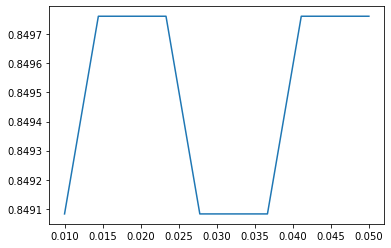

In [77]:
import matplotlib.pyplot as plt

# Adjustment in the direction of capturing more of the minority classes - to capture more of the minority classes with as 
# little loss of the majority classes as possible, reaching a point of maximum accuracy

irange = np.linspace(0.01,0.05,10)

score = []
for i in irange:
    clf = SVC(kernel = 'linear'
              ,gamma = 'auto'
              ,cache_size = 5000
              ,class_weight={1:1+i} 
             ).fit(X_train, y_train)
    result = clf.predict(X_test)
    score.append(clf.score(X_test, y_test))  # Accuracy
    
plt.figure()
plt.plot(irange, score)

In [80]:
irange = np.linspace(0.01,0.03,10)

for i in irange:
    clf = SVC(kernel = 'linear'
              ,gamma = 'auto'
              ,cache_size = 5000
              ,class_weight={1:1+i} 
             ).fit(X_train, y_train)
    result = clf.predict(X_test)
    score = clf.score(X_test, y_test)
    recall = recall_score(y_test, result)
    auc = roc_auc_score(y_test, clf.decision_function(X_test))
    print('Under 1:{}, accuracy is {}, recall is {}, auc is {}'.format(i,score, recall, auc))
    print(datetime.datetime.fromtimestamp(time()-times).strftime('%M:%S:%f'))

Under 1:0.01, accuracy is 0.849082256968049, recall is 0.4755700325732899, auc is 0.8646641369197533
27:22:718712
Under 1:0.012222222222222221, accuracy is 0.849762066621346, recall is 0.4788273615635179, auc is 0.8648376372611571
27:26:411864
Under 1:0.014444444444444444, accuracy is 0.849762066621346, recall is 0.4788273615635179, auc is 0.8648404356537603
27:30:169814
Under 1:0.016666666666666666, accuracy is 0.849762066621346, recall is 0.4788273615635179, auc is 0.8646921208457861
27:34:035473
Under 1:0.018888888888888886, accuracy is 0.849762066621346, recall is 0.4788273615635179, auc is 0.8646277578159105
27:37:817460
Under 1:0.02111111111111111, accuracy is 0.849762066621346, recall is 0.4788273615635179, auc is 0.8646417497789269
27:41:566796
Under 1:0.02333333333333333, accuracy is 0.849762066621346, recall is 0.4788273615635179, auc is 0.8646053706750841
27:45:508225
Under 1:0.025555555555555554, accuracy is 0.849082256968049, recall is 0.4788273615635179, auc is 0.86463055

Findings:
I did not getting higher accuracy.
I will consider trying another model.

In [92]:
# Trying Linear Regression

from sklearn.linear_model import LogisticRegression as LR
logreg = LR(solver='liblinear').fit(X_train, y_train)
logreg.score(X_test, y_test)

0.8484024473147519

In [87]:
C_range = np.linspace(0.01,0.2,10)

for c in C_range:
    logreg = LR(solver='liblinear', C=c).fit(X_train, y_train)
    print(c,logreg.score(X_test, y_test))
# 舍弃logisticRegression

0.01 0.8395649218218899
0.03111111111111111 0.8450033990482665
0.052222222222222225 0.8456832087015635
0.07333333333333333 0.8470428280081577
0.09444444444444444 0.849082256968049
0.11555555555555555 0.849762066621346
0.1366666666666667 0.8504418762746431
0.1577777777777778 0.8484024473147519
0.1788888888888889 0.8477226376614548
0.2 0.8470428280081577


## Highest AUC - ROC curve

In [89]:
from sklearn.metrics import roc_curve as ROC

In [94]:
clf = SVC(kernel = 'linear'
          ,gamma = 'auto'
          ,cache_size = 5000
         ).fit(X_train, y_train)
result = clf.predict(X_test)
score = clf.score(X_test, y_test)
recall = recall_score(y_test, result)
auc = roc_auc_score(y_test, clf.decision_function(X_test))

In [95]:
score

0.849082256968049

In [96]:
recall

0.4755700325732899

In [97]:
auc

0.8647536854830586

In [98]:
FPR, Recall, Thresholds = ROC(y_test,clf.decision_function(X_test),pos_label=1)
area = roc_auc_score(y_test,clf.decision_function(X_test))

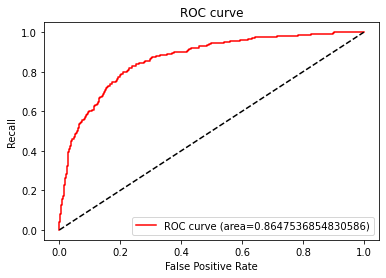

In [100]:
plt.figure()
plt.plot(FPR, Recall, color='red'
        ,label='ROC curve (area={})'.format(area))
plt.plot([0,1],[0,1],color='black',linestyle='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('Recall')
plt.title('ROC curve')
plt.legend(loc='lower right')
plt.show()

In [101]:
maxindex = (Recall - FPR).tolist().index(max(Recall-FPR))
Thresholds[maxindex]  #best threshold

-0.9808004112443867

In [102]:
# Based on the best threshold，calculate y_prect
from sklearn.metrics import accuracy_score as AC

time = time()
clf = SVC(kernel = 'linear'
          ,gamma = 'auto'
          ,cache_size = 5000
          ,class_weight = 'balanced'
         ).fit(X_train, y_train)

# create dataframe
prob = pd.DataFrame(clf.decision_function(X_test))

In [105]:
prob.head()

,0,y_pred
0,-1.038628,0.0
1,0.121101,1.0
2,-1.448225,0.0
3,-1.495193,0.0
4,0.829631,1.0


In [104]:
# add y_pred column
prob.loc[prob.iloc[:,0] >= Thresholds[maxindex],'y_pred'] = 1
prob.loc[prob.iloc[:,0] < Thresholds[maxindex],'y_pred'] = 0

In [107]:
prob.iloc[:,1].isnull().sum()

0

In [109]:
# check accuracy
score = AC(y_test, prob.iloc[:,1].values)  # 计算Accuracy
recall = recall_score(y_test,prob.iloc[:,1])
print('Tesing accuracy is {}, recall is {}'.format(score, recall))

Tesing accuracy is 0.5975526852481305, recall is 0.9381107491856677


Findings:
The AUC area reaches an acceptable level. At this point ACCURACY is not high.